    FOREX PREDICTION DATA ANALYSIS

        Objectives
            - Load and preprocess dataset
            - Inspect data for empty values, wrong data types, wrong formats, duplicated and outliers
            - Analyse the data to find patterns and relationships
            - Visualise the data to understand trends and distributions
            - Evaluate the model performance using appropriate metrics
            - Identify patterns and correlations in EUR/USD exchange rates movements
            - Save the cleaned and processed data for future use

In [105]:
#Necessary imports for the script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime

In [106]:
df = pd.read_csv('datasets/forex_predictions_data.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Predicted_Close,Currency_Pair,Signal,Confidence
0,2024-01-01,1.18727,1.92461,0.85312,1.18154,2201,1.22984,EUR/USD,Hold,0.90
1,2024-01-02,1.47536,1.82881,0.54067,1.32296,error,1.03797,EUR/USD,Sell,NaN
2,2024-01-03,1.36600,1.78415,0.54242,1.28539,4420,1.03888,EUR/USD,Sell,NaN
3,2024-01-04,1.29933,1.54684,0.99332,1.17805,4079,1.00117,EUR/USD,Sell,0.64
4,2024-01-05,1.07801,1.68386,0.68714,NaN,1832,1.48385,EUR/USD,Sell,0.68


In [107]:
df.dtypes

Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume              object
Predicted_Close    float64
Currency_Pair       object
Signal              object
Confidence         float64
dtype: object

In [ ]:
#Key findings
# 1. The dataset contains 229 rows and 10 columns.
df.shape
Matrix of Numerical Columns

(229, 10)

    Handling Bad Data

In [109]:
# Step 2: Check for missing values in each column
df.isnull().sum()


Date                3
Open                5
High                9
Low                 4
Close              17
Volume              3
Predicted_Close     7
Currency_Pair       0
Signal              2
Confidence         11
dtype: int64

In [110]:
#Handling missing values in the numerical columns
numerical_columns = ['Open', 'High', 'Low', 'Close', 'Predicted_Close', 'Confidence']
for column in numerical_columns:
    df[column].fillna(df[column].mean(), inplace=True)
df.isnull().sum()

/tmp/ipykernel_33318/2199459923.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Date               3
Open               0
High               0
Low                0
Close              0
Volume             3
Predicted_Close    0
Currency_Pair      0
Signal             2
Confidence         0
dtype: int64

In [118]:

# Step 3: Convert 'Volume' column to numeric, replacing 'error' with NaN
df['Volume'] = pd.to_numeric(df['Volume'], errors='coerce')
#Fill NaN values in 'Volume' with the mode of the column
df['Volume'].fillna(df['Volume'].mode()[0], inplace=True)
# Confirm conversion
df['Volume'].head()


/tmp/ipykernel_33318/302903854.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Volume'].fillna(df['Volume'].mode()[0], inplace=True)


0    2201.0
1    1804.0
2    4420.0
3    4079.0
4    1832.0
Name: Volume, dtype: float64

In [119]:
# Convert Signal column to categorical codes
df['Signal'] = df['Signal'].astype('category').cat.codes
df['Signal'].head()

0    2
1    3
2    3
3    3
4    3
Name: Signal, dtype: int8

In [120]:
#Date column conversion
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
#Fill null values in 'Date' with the mode date
df['Date'].fillna(df['Date'].mode()[0], inplace=True)
df['Date'].head()


/tmp/ipykernel_33318/2789011485.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(df['Date'].mode()[0], inplace=True)


0   2024-01-01
1   2024-01-02
2   2024-01-03
3   2024-01-04
4   2024-01-05
Name: Date, dtype: datetime64[ns]

In [128]:
#CHeck for duplicate dates
df['Date'].duplicated().sum()


np.int64(3)

In [130]:
#Drop duplicate rows based on 'Date' column but keep the first occurrence
df.drop_duplicates(subset='Date', keep='first', inplace=True)
# Confirm no duplicates remain
df['Date'].duplicated().sum()

np.int64(0)

In [131]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
Predicted_Close    0
Currency_Pair      0
Signal             0
Confidence         0
dtype: int64

In [132]:
#Catering for outliers in numerical columns using standard deviation method replacing outliers with mode
def replace_outliers_with_mode(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    threshold = 3 * std_dev
    mode = df[column].mode()[0]
    df.loc[(df[column] < mean - threshold) | (df[column] > mean + threshold), column] = mode
    return df

for column in numerical_columns:
    df = replace_outliers_with_mode(df, column)

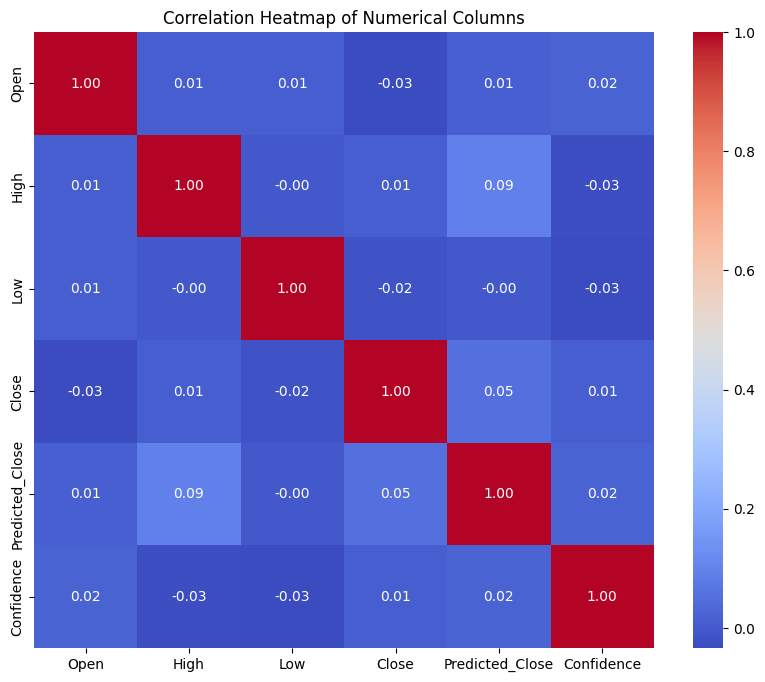

In [134]:
#Correlation matrix to visualize relationships between numerical columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()
#Visualizing the distribution of numerical columns